## Exploring and pre-processing the data
*The dataset contains 1500 rows and 8 columns in total. The datset has one column ("web_browser") with 150 rows of missing data. I have validated the data and pre-processed the data according to the instructions in table given in the project description. In the pre-processing stage I first counted the number of missing values in each column, then total sum of missing datapoints, then dropped rows with missing values in 'owned' column, replaced missing values with unknown for the make_model, review_month, web_browser, and primary_use columns. Then replaced missing values with average age for 'reviewer_age' column this one was tricky because missing values actually showed '-' instead of a blank space, then Replaced missing values with 0 for 'value_for_money' column, and Replaced missing values with average rating for 'overall_rating' column all changes were made in-place to ensure the changes carry forward through the analysis.*


In [13]:
import pandas as pd
import numpy as np

df =  pd.read_csv('data.csv')
num_rows, num_cols = df.shape
print(f"The dataset has {num_rows} rows and {num_cols} columns.")

#counting the number of missing values in each column
missing_counts = df.isna().sum()
num_cols_w_missing = sum(missing_counts > 0)
num_rows_w_missing = df.isna().any(axis =1).sum()
print(f"The dataset has {num_rows_w_missing} rows with missing data and {num_cols_w_missing} column with missing data.")
print(missing_counts)

#drop rows with missing values in 'owned' column 
df.dropna(subset=['owned'], inplace = True)
#replace missing values with unknown
df['make_model'].fillna('unknown', inplace = True)
df['review_month'].fillna('unknown', inplace = True)
df['web_browser'].fillna('unknown', inplace = True)
df['primary_use'].fillna('unknown', inplace = True)

# Replace missing values with average age for 'reviewer_age' column
df['reviewer_age'] = df['reviewer_age'].replace('-', '')
avg_age = df['reviewer_age'].mean()
df['reviewer_age'].fillna(avg_age, inplace=True)
# Replace missing values with 0 for 'value_for_money' column
df['value_for_money'].fillna(0, inplace=True)

# Replace missing values with average rating for 'overall_rating' column
avg_rating = df['overall_rating'].mean()
df['overall_rating'].fillna(avg_rating, inplace=True)
df.shape

The dataset has 1500 rows and 8 columns.
The dataset has 150 rows with missing data and 1 column with missing data.
owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64


(1500, 8)

## Bar plot desciption
*In output below we can see the total number of reviews from owners and non owners in the bar plot and can see that owner reviews have the most number of observations. We can also see that the observations are not balanced across the owner and non owner categories with owner reviews being roughly 50% higher than that of non owners*

The owners category has the most number of observations
The observations are NOT balanced across categories of the variable 'owner'


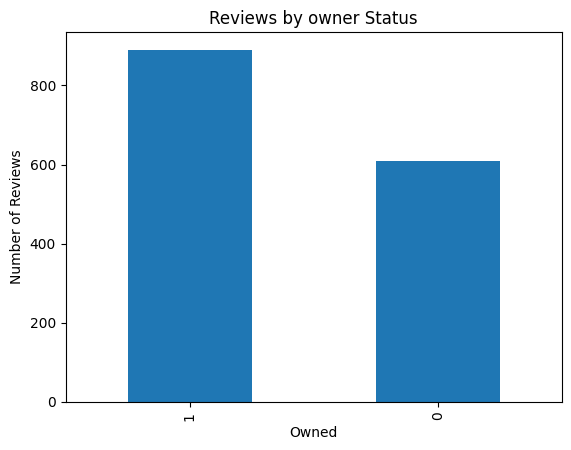

In [14]:
#counting the number of reviews from owners and non owners
import matplotlib.pyplot as plt
owner_counts = df ['owned'].value_counts()
#
owner_counts.plot(kind= 'bar')
plt.xlabel('Owned')
plt.ylabel('Number of Reviews')
plt.title('Reviews by owner Status')

most_owned = owner_counts.index[0]
if most_owned == 1:
    print(f'The owners category has the most number of observations')
else:
    print(f'The non owners category has the most number of observations')

if owner_counts[0] == owner_counts[1]:
    print("The observations are balanced across categories of the variable 'owner'")
else:
    print("The observations are NOT balanced across categories of the variable 'owner'")


## Describing the distribution and the histogram below
*Using the .describe() function we can see that the total number of observations are 1500 datapoits, an average review of 17.14, the standard deviation of the data is 2.45, the lowest review is 11.69, 25% of reviews are less than or equal to 15.32, 50% of the reviews are less than or equal to 18.24, and 75% of the reviews are less than or equal to 18.84, and the highest review is 22.76. As can be seen in the histogram and the result from the scipy skew() function the distribution is displaying a left skew in its distribution.*

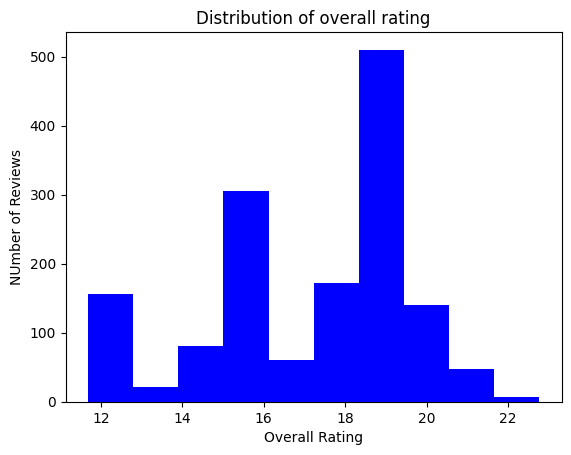

count    1500.000000
mean       17.138907
std         2.445566
min        11.690000
25%        15.320000
50%        18.240000
75%        18.840000
max        22.760000
Name: overall_rating, dtype: float64
-0.5901576982135008


In [21]:
from scipy.stats import skew
plt.hist(df['overall_rating'], bins = 10, color = 'blue')
plt.xlabel('Overall Rating')
plt.ylabel('NUmber of Reviews')
plt.title('Distribution of overall rating')
plt.show()
print(df['overall_rating'].describe())
print(skew(df['overall_rating']))

## Describing the relationship between owned variable and overall rating
*The boxplot below shows that there average overall rating for the owned category shows a much higher and more concentrated instance of better reviews with a few outliers past the upper bound of the distribution and more outliers in the lower bound of the distribution. We can see that the review ratings are more spread out in the non owner category with a lower oaverage overall rating*

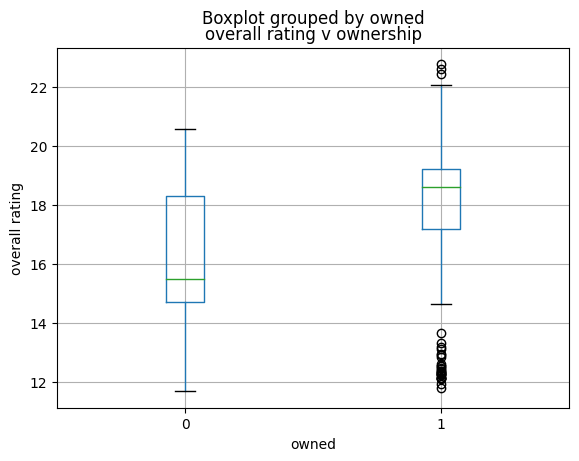

In [16]:
#box plot with owned as the grouping variable
df.boxplot(column= 'overall_rating', by = 'owned')
plt.title('overall rating v ownership')
plt.xlabel('owned')
plt.ylabel('overall rating')
plt.show()

## Determining what type of machine learning model should be used
*A regression based supervised machined learning model is appropirate for this problem, specifically a logistic regression base model given the binary nature of the owned category and the binary nature of the problem "predict whether a review is coming from and owner (1) or non owner (0)"*

## Building the appropriate machine learning model
*Regression based supervised machine learning model. Specifically a logistic regression based machine learning model.*

In [17]:
# Start coding here... 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(df[['overall_rating']], df['owned'], test_size=0.3, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7022222222222222


## Building a comparison model
*for the comparison model I chose a decision tree classifier as this is something I have used in a similar problem in my graduate data mining and machine learning course. it is a supervised machine learning model that was used in conjunction with a logistic regression based model to predict the binary classification problem. It seems to be the best comparison to the logistic regression model in my opinion*

In [20]:
# Start coding here... 
from sklearn.tree import DecisionTreeClassifier
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(df[['overall_rating']], df['owned'], test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_dt, y_train_dt)
y_pred_dt = dt.predict(x_test_dt)
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print("Decision Tree accuracy:", accuracy_dt)


Decision Tree accuracy: 0.6444444444444445


## Why were these models chosen
*the company's goal is a binary classification problem to predict whether a review came from an owner or not which is a binary outcome similar to credit risk scoring using a logistic regression. In this case building out a logistic regression supervised learning model is the ideal tool to achieve the company's goal. The decision tree model is a good comparison model becuase it is also frequently used for binary classification problems like the one presentated by the company, however decision tree models are used when the decision boundaries are are complex and nonlinear.*

## Model accuracy
*Based on the sklearn accuracy_score for each model I am confident that using the logistic regression based model will be able to predict whehter a review came from an owner or not with greater accuracy than the decision tree model*

In [19]:
# Start coding here... 
print("Logistic regression accuracy:", accuracy)
print("Decision Tree accuracy:", accuracy_dt)

Logistic regression accuracy: 0.7022222222222222
Decision Tree accuracy: 0.6444444444444445


## Explanation of the models and why the logistic regression outperformed the decision tree classifier model
*It is very likely that the logistic regression model performance better because the decision tree model mave have overfit the training and did not generalize well enough during testing. This is a common issue with decision tree models use in this manner. The logisitic regression model ourperformed very likely because of the binary decision boundary present in the data.*